In [2]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tarih              227520 non-null  object 
 1   ürün               227520 non-null  object 
 2   ürün besin değeri  227520 non-null  int64  
 3   ürün kategorisi    227520 non-null  object 
 4   ürün fiyatı        227520 non-null  float64
 5   ürün üretim yeri   227520 non-null  object 
 6   market             227520 non-null  object 
 7   şehir              227520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB


In [5]:
df.describe()

,ürün besin değeri,ürün fiyatı
count,227520.000000,227520.000000
mean,143.113924,17.018837
std,133.218871,14.470524
min,8.000000,0.740000
25%,41.000000,7.380000
50%,83.000000,12.860000
75%,250.000000,21.630000
max,402.000000,164.530000


In [6]:
df.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2019-01-01,kıyma,120,et,32.70,Yurt içi,K,S
1,2019-01-01,tavuk,103,et,11.04,Yurt içi,K,S
2,2019-01-01,hindi,160,et,11.20,Yurt içi,K,S
3,2019-01-01,Bakla-kuru,354,sebze ve bakliyat,7.04,Yurt içi,K,S
4,2019-01-01,Bakla-taze,72,sebze ve bakliyat,13.28,Yurt içi,K,S


eğitim

In [7]:
# Tarihleri yıl ve aya böl
df['tarih'] = pd.to_datetime(df['tarih'])
df['year'] = df['tarih'].dt.year
df['month'] = df['tarih'].dt.month

# Gereksiz sütunları düşür
df = df.drop(columns=['tarih', 'ürün besin değeri'])

# Kategorik değişkenleri one-hot encode et (veya label encode)
df = pd.get_dummies(df, columns=['ürün', 'ürün kategorisi', 'ürün üretim yeri', 'market', 'şehir'], drop_first=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 96 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   ürün fiyatı                                  227520 non-null  float64
 1   year                                         227520 non-null  int32  
 2   month                                        227520 non-null  int32  
 3   ürün_Bakla-kuru                              227520 non-null  bool   
 4   ürün_Bakla-taze                              227520 non-null  bool   
 5   ürün_Bamya                                   227520 non-null  bool   
 6   ürün_Barbunya-kuru                           227520 non-null  bool   
 7   ürün_Bezelye-taze                            227520 non-null  bool   
 8   ürün_Biber-yeşil                             227520 non-null  bool   
 9   ürün_Brüksel laha.                           227520 non-nul

In [10]:
# Kategorik değişkenleri isim olarak ver
cat_features = ['ürün', 'ürün kategorisi', 'ürün üretim yeri', 'market', 'şehir']

# Yeniden yüklemeden önce bu kez kategorikleri koru
df_orig = pd.read_csv("train.csv")
df_orig['tarih'] = pd.to_datetime(df_orig['tarih'])
df_orig['year'] = df_orig['tarih'].dt.year
df_orig['month'] = df_orig['tarih'].dt.month

X = df_orig.drop(columns=['tarih', 'ürün besin değeri', 'ürün fiyatı'])
y = df_orig['ürün fiyatı']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(verbose=100, cat_features=cat_features)
model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_val, y_val))


Learning rate set to 0.115274
0:	learn: 13.1175096	test: 13.0348251	best: 13.0348251 (0)	total: 359ms	remaining: 5m 58s
100:	learn: 2.9488694	test: 2.6084764	best: 2.6084764 (100)	total: 11.3s	remaining: 1m 40s
200:	learn: 2.8054887	test: 2.4842810	best: 2.4842810 (200)	total: 24.2s	remaining: 1m 36s
300:	learn: 2.6793714	test: 2.3720473	best: 2.3720280 (299)	total: 38.1s	remaining: 1m 28s
400:	learn: 2.6124791	test: 2.3145441	best: 2.3145441 (400)	total: 51s	remaining: 1m 16s
500:	learn: 2.5108842	test: 2.2237775	best: 2.2237775 (500)	total: 1m 3s	remaining: 1m 3s
600:	learn: 2.4236522	test: 2.1530246	best: 2.1530246 (600)	total: 1m 15s	remaining: 50.1s
700:	learn: 2.3675353	test: 2.1120343	best: 2.1120343 (700)	total: 1m 26s	remaining: 36.9s
800:	learn: 2.3201325	test: 2.0732241	best: 2.0732241 (800)	total: 1m 38s	remaining: 24.4s
900:	learn: 2.2790105	test: 2.0381598	best: 2.0381598 (900)	total: 1m 49s	remaining: 12s
999:	learn: 2.2376549	test: 1.9987454	best: 1.9987454 (999)	total:

In [12]:
test_df = pd.read_csv("testFeatures.csv")
test_df['tarih'] = pd.to_datetime(test_df['tarih'])
test_df['year'] = test_df['tarih'].dt.year
test_df['month'] = test_df['tarih'].dt.month
X_test = test_df.drop(columns=['tarih', 'ürün besin değeri'])
X_test = X_test[X_train.columns]
# Tahmin yap
test_pool = Pool(X_test, cat_features=cat_features)
predictions = model.predict(X_test)

# Sample Submission'a yaz
sample = pd.read_csv("submission.csv")
sample['ürün fiyatı'] = predictions
sample.to_csv("submission.csv", index=False)


Modelin doğruluk değerleri

In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_val = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
print("Validation RMSE:", rmse)


Validation RMSE: 1.9987453885737443


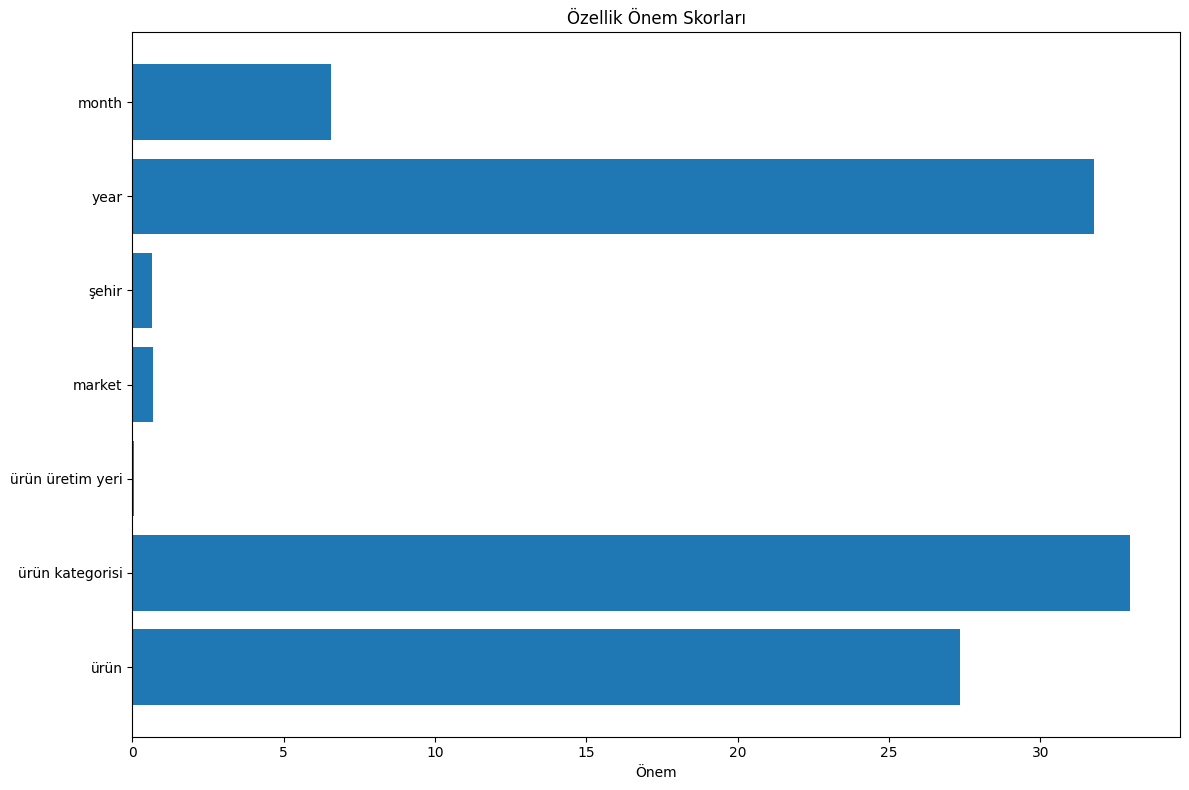

In [28]:
import matplotlib.pyplot as plt

feature_importances = model.get_feature_importance()
feature_names = X_train.columns

plt.figure(figsize=(12, 8))
plt.barh(feature_names, feature_importances)
plt.title("Özellik Önem Skorları")
plt.xlabel("Önem")
plt.tight_layout()
plt.show()


Parametre ayarlaması